<font size="6">Análisis exploratorio de datos</font>

In [1]:
#Importamos las librerias
import pandas as pd
from scipy.stats import mannwhitneyu

In [2]:
#Cargamos los dataframes
clients = pd.read_csv('/datasets/telecom_clients_us.csv')
datasets = pd.read_csv('/datasets/telecom_dataset_us.csv')

In [3]:
#Damos un vistazo inicial a los dataframes
print(clients.shape)
clients.info()
display(clients)
print()
print(datasets.shape)
datasets.info()
display(datasets)

(732, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16
...,...,...,...
727,166554,B,2019-08-08
728,166911,B,2019-08-23
729,167012,B,2019-08-28
730,166867,B,2019-08-22



(53902, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25
...,...,...,...,...,...,...,...,...,...
53897,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,True,1,0,38
53898,168606,2019-11-11 00:00:00+03:00,out,True,957922.0,False,2,479,501
53899,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190
53900,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190


Observamos los dos dataframes, esta informacion es mas que suficiente para encontrar la informacion que necesitamos.

In [4]:
print(clients.isnull().sum())
print(clients.duplicated().sum())
print()
print(datasets.isnull().sum())
print(datasets.duplicated().sum())

num_operadores = datasets['operator_id'].nunique()
print(f"Total de operadores: {num_operadores}")

user_id        0
tariff_plan    0
date_start     0
dtype: int64
0

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64
4900
Total de operadores: 1092


In [5]:
#Cambiamos el tipo de dato para las fechas
clients['date_start'] = pd.to_datetime(clients['date_start'])
datasets['date'] = pd.to_datetime(datasets['date'])

Hasta este punto no hemos realizado nada mas que simples visualizaciones en los dataframes.

In [6]:
full_dataset = pd.merge(datasets,
                       clients,
                       on = 'user_id',
                       how = 'left')
full_dataset

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4,B,2019-08-01
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,B,2019-08-01
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,B,2019-08-01
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18,B,2019-08-01
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25,B,2019-08-01
...,...,...,...,...,...,...,...,...,...,...,...
53897,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,True,1,0,38,C,2019-10-31
53898,168606,2019-11-11 00:00:00+03:00,out,True,957922.0,False,2,479,501,C,2019-10-31
53899,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190,C,2019-10-31
53900,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190,C,2019-10-31


Unimos ambos dataframes, aunque no tengo idea de como influira el plan de cada usuario en lo que estamos realizando.

In [7]:
#Creamos una nueva columna para observar el tiempo de espera para cada llamada
full_dataset['waiting'] = full_dataset['total_call_duration'] - full_dataset['call_duration']

#Seleccionamos unicamente las llamadas en las que conocemos al operador
calls_with_operator = full_dataset[full_dataset['operator_id'].notnull()]

#Creamos el dataframe sobre el cual trabajaremos
operators = calls_with_operator.groupby('operator_id').agg({
    'is_missed_call': 'sum',
    'waiting': 'sum'
}).rename(columns={
    'is_missed_call': 'missed_calls',
    'waiting': 'total_waiting'
})

#Separamos las llamadas entrantes y salientes y lo unimos al operators
direction_counts = calls_with_operator.groupby(['operator_id', 'direction'])['calls_count'].sum().unstack(fill_value=0)
direction_counts.columns = ['incoming_calls', 'outgoing_calls']

operators = operators.join(direction_counts)

#Cambiare la opcion de visualizacion de los decimales para facilitar la exploracion
pd.set_option('display.float_format', '{:,.0f}'.format)
display(operators)
print(operators.describe())

pd.reset_option('display.float_format')

,missed_calls,total_waiting,incoming_calls,outgoing_calls
operator_id,,,,
"879,896",50,14166,60,1071
"879,898",100,112972,118,7856
"880,020",7,334,8,46
"880,022",33,4375,8,211
"880,026",94,23992,25,2414
...,...,...,...,...
"972,410",2,1498,0,77
"972,412",2,1050,1,60
"972,460",3,801,2,68


       missed_calls  total_waiting  incoming_calls  outgoing_calls
count         1,092          1,092           1,092           1,092
mean             14         13,081              95             613
std              20         71,467             334           3,103
min               0              0               0               0
25%               1            152               0               2
50%               6          1,113               5              36
75%              21          8,574              38             389
max             135      1,586,416           5,221          64,897


Nos sera mas sencillo trabajar sobre este nuevo dataframe. Me tome la libertad de ignorar las llamadas que no tenian operador, no me son de utilidad pues es justamente la columna de 'operator_id' con la cual agruparemos. He seleccionado las columna que me parecen mas representativas para identificar la eficacia de los operadores.

<font size="6">Identificar operadores ineficaces</font>

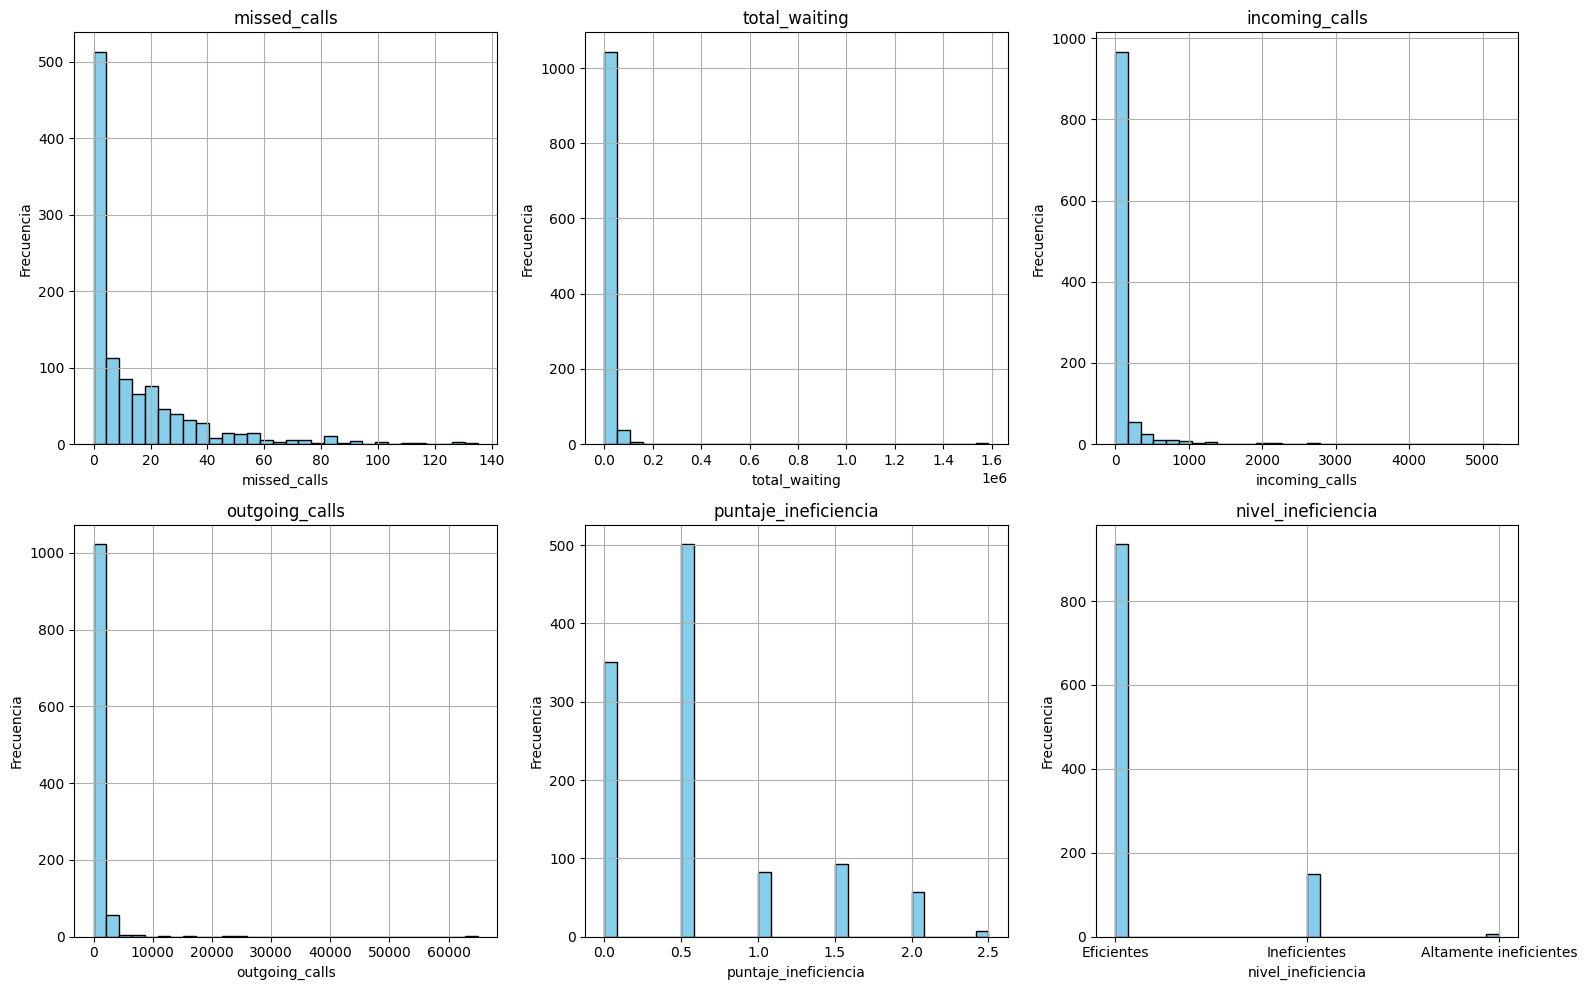

In [20]:
import matplotlib.pyplot as plt

# Opcional: tamaño general de las gráficas
plt.figure(figsize=(16, 10))

# Iteramos sobre cada columna numérica
for i, column in enumerate(operators.columns):
    plt.subplot(2, 3, i + 1)  # Crea un grid de 2 filas x 3 columnas
    operators[column].hist(bins=30, color='skyblue', edgecolor='black')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Damos un vistazo breve a las metricas que utilizaremos, aqui ya podemos dar un vistazo de como se distribuyen los operadores.

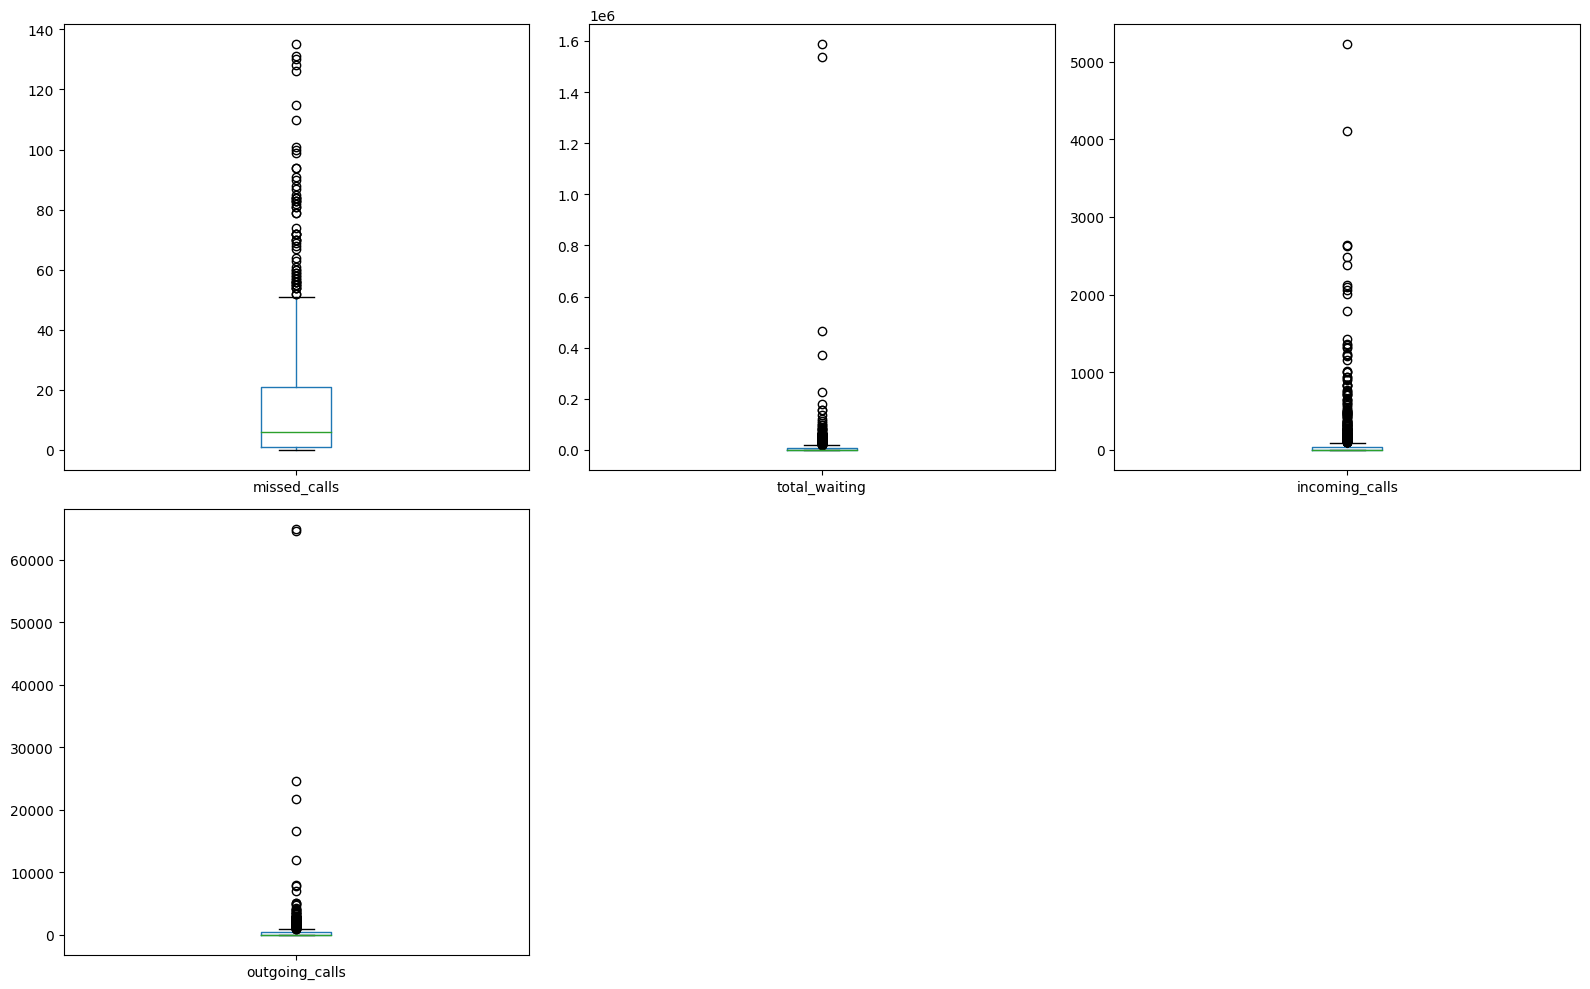

In [9]:
operators.plot(kind='box', subplots=True, layout=(2, 3), figsize=(16, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

Con ayuda de estos boxplot podemos observar que darnos cuenta de como se distribuyen los valores en cada metrica.

In [17]:
#Por medio de percentiles definire mis parametros para encontrar a los operadores ineficaces
percentiles = [0.01, 0.05, 0.10, 0.15, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 0.80, 0.90, 0.95, 0.99]

percentile_values = operators.quantile(percentiles)

display(percentile_values)

,missed_calls,total_waiting,incoming_calls,outgoing_calls,puntaje_ineficiencia
0.01,0.0,3.00,0.00,0.00,0.0
0.05,0.0,15.00,0.00,0.00,0.0
0.10,0.0,36.00,0.00,0.00,0.0
0.15,0.0,62.00,0.00,0.00,0.0
0.20,1.0,104.20,0.00,1.00,0.0
0.30,1.0,242.30,0.00,4.00,0.0
0.40,3.0,501.00,2.00,13.00,0.5
0.50,6.0,1113.00,5.00,36.50,0.5
0.60,10.0,2432.60,11.00,105.60,0.5
0.75,21.0,8573.50,38.25,388.75,0.5


Observamos varios percentiles para cada metrica, en base a esto establecere un sistema de puntajes en el cual cada columna tendra cierto valor:

missed_calls: 24 llamadas perdidas otorgan medio punto. A partir de 38 se otorga punto completo.

total_waiting: 15000 segundos equivalen a medio punto. A partir de 32000 se otorga punto completo.

incoming_calls: 0 llamadas otorgan medio punto.

outgoing_calls: 0 llamadas otorgan medio punto.

In [11]:
def calcular_ineficiencia(row):
    puntaje = 0
    
    #missed_calls
    if row['missed_calls'] >= 38:
        puntaje += 1
    elif row['missed_calls'] >= 24:
        puntaje += 0.5
    
    #total_waiting
    if row['total_waiting'] >= 32000:
        puntaje += 1
    elif row['total_waiting'] >= 15000:
        puntaje += 0.5
    
    #incoming_calls
    if row['incoming_calls'] == 0:
        puntaje += 0.5
    
    #outgoing_calls
    if row['outgoing_calls'] == 0:
        puntaje += 0.5
    
    return puntaje

Aplicamos los criterios previamente explicados.

In [12]:
#Aplicamos la funcion
operators['puntaje_ineficiencia'] = operators.apply(calcular_ineficiencia, axis=1)

# Clasificamos segun el puntaje de eficiencia
operators['nivel_ineficiencia'] = pd.cut(
    operators['puntaje_ineficiencia'],
    bins=[-1, 1.0, 2.0, 3.0],
    labels=['Eficientes', 'Ineficientes', 'Altamente ineficientes']
)

display(operators.sort_values('puntaje_ineficiencia', ascending=False))

#Imprimimos el total para cada puntaje
print("\nResumen de ineficiencia:")
print(operators['nivel_ineficiencia'].value_counts())

,missed_calls,total_waiting,incoming_calls,outgoing_calls,puntaje_ineficiencia,nivel_ineficiencia
operator_id,,,,,,
945302.0,40,154973,0,7059,2.5,Altamente ineficientes
893674.0,47,51203,0,2701,2.5,Altamente ineficientes
902782.0,39,35118,0,1473,2.5,Altamente ineficientes
902748.0,38,61217,0,2831,2.5,Altamente ineficientes
945296.0,41,52591,0,2821,2.5,Altamente ineficientes
...,...,...,...,...,...,...
908080.0,0,108,7,1,0.0,Eficientes
908082.0,2,443,31,20,0.0,Eficientes
939716.0,5,251,14,16,0.0,Eficientes



Resumen de ineficiencia:
Eficientes                935
Ineficientes              150
Altamente ineficientes      7
Name: nivel_ineficiencia, dtype: int64


Obtenemos exitosamente la columna que nos muestra la eficacia para cada operador. Encontramos que tenemos 935 operadores eficaces, 150 ineficaces y 7 altamente ineficaces.

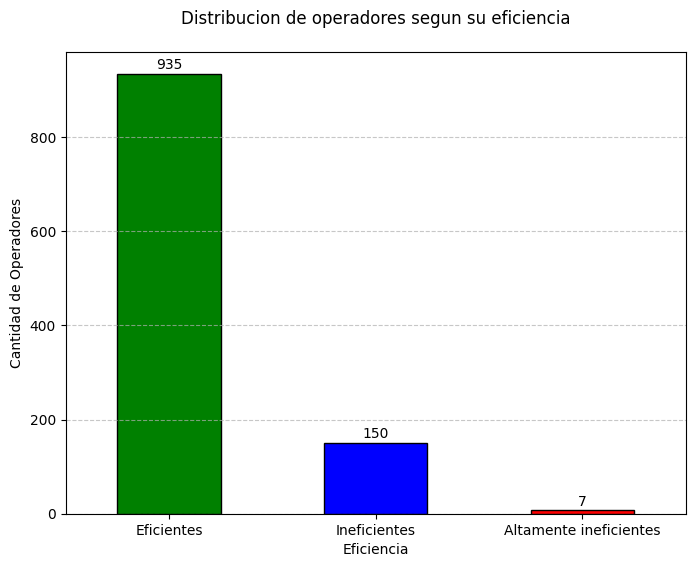

In [15]:
#Grafico de barras para mostrar la distribucion de operadores
plt.figure(figsize=(8, 6))
operators['nivel_ineficiencia'].value_counts().sort_index().plot(
    kind='bar', 
    color=['green', 'blue', 'red'],  
    edgecolor='black'
)

plt.title('Distribucion de operadores segun su eficiencia', pad=20)
plt.xlabel('Eficiencia')
plt.ylabel('Cantidad de Operadores')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(operators['nivel_ineficiencia'].value_counts().sort_index()):
    plt.text(i, v + 10, str(v), ha='center')

plt.show()

Visualizamos los resultados.

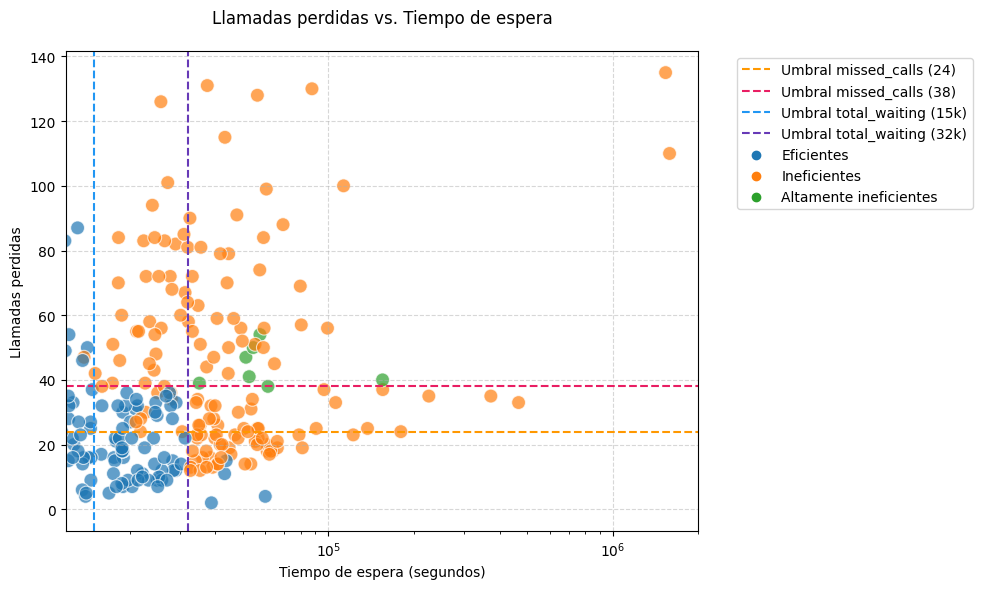

In [14]:
import seaborn as sns

plt.figure(figsize=(10, 6))

#Graficos de dispersion de llamadas perdidas vs tiempo de espera
sns.scatterplot(
    data=operators,
    x='total_waiting',
    y='missed_calls',
    hue='nivel_ineficiencia',
    s=100,
    alpha=0.7
)

plt.axhline(y=24, color='#FF9800', linestyle='--', label='Umbral missed_calls (24)')
plt.axhline(y=38, color='#E91E63', linestyle='--', label='Umbral missed_calls (38)')
plt.axvline(x=15000, color='#2196F3', linestyle='--', label='Umbral total_waiting (15k)')
plt.axvline(x=32000, color='#673AB7', linestyle='--', label='Umbral total_waiting (32k)')

# Personalización
plt.title('Llamadas perdidas vs. Tiempo de espera', pad=20)
plt.xlabel('Tiempo de espera (segundos)')
plt.ylabel('Llamadas perdidas')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xscale('log')  
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Con ayuda de este grafico de dispresion nos podemos dar una idea de como se distribuyen los operadores segun su eficiencia.

<font size="6">Prueba las hipótesis estadísticas</font>

Hipotesis nula (H0): No existe diferencia significativa entre los grupos.

Hipotesis alternativa (H1): Existe una diferencia significativa entre los grupos.

Alpha: 0.05

In [26]:
#Separamos los operadores para facilitar la tarea
eficientes = operators[operators['nivel_ineficiencia'] == 'Eficientes']

ineficientes = operators[operators['nivel_ineficiencia'] == 'Ineficientes']

altamente_ineficientes = operators[operators['nivel_ineficiencia'] == 'Altamente ineficientes']


#Importamos scipy.stats
from scipy.stats import ttest_ind

grupos = {
    'Eficientes': eficientes,
    'Ineficientes': ineficientes,
    'Altamente ineficientes': altamente_ineficientes
}

columnas = ['missed_calls', 'total_waiting', 'incoming_calls', 'outgoing_calls']
comparaciones = [
    ('Eficientes', 'Ineficientes'),
    ('Eficientes', 'Altamente ineficientes'),
    ('Ineficientes', 'Altamente ineficientes')
]

alpha = 0.05 / len(comparaciones)  

for col in columnas:
    print(f"\nPruebas t para {col}:")
    for grupo1, grupo2 in comparaciones:
        stat, p = ttest_ind(grupos[grupo1][col], grupos[grupo2][col], equal_var=False)
        resultado = "No hay diferencia significativa" if p > alpha else "Hay diferencia significativa"
        print(f"{grupo1} vs {grupo2}: p = {p:.4f} → {resultado}")


Pruebas t para missed_calls:
Eficientes vs Ineficientes: p = 0.0000 → Hay diferencia significativa
Eficientes vs Altamente ineficientes: p = 0.0000 → Hay diferencia significativa
Ineficientes vs Altamente ineficientes: p = 0.4849 → No hay diferencia significativa

Pruebas t para total_waiting:
Eficientes vs Ineficientes: p = 0.0000 → Hay diferencia significativa
Eficientes vs Altamente ineficientes: p = 0.0057 → Hay diferencia significativa
Ineficientes vs Altamente ineficientes: p = 0.8652 → No hay diferencia significativa

Pruebas t para incoming_calls:
Eficientes vs Ineficientes: p = 0.0000 → Hay diferencia significativa
Eficientes vs Altamente ineficientes: p = 0.0000 → Hay diferencia significativa
Ineficientes vs Altamente ineficientes: p = 0.0000 → Hay diferencia significativa

Pruebas t para outgoing_calls:
Eficientes vs Ineficientes: p = 0.0000 → Hay diferencia significativa
Eficientes vs Altamente ineficientes: p = 0.0032 → Hay diferencia significativa
Ineficientes vs Altamen

Comprobamos que los operadores eficientes se comportan de manera totalmente distinta que los operadores ineficientes y los altamente ineficientes. Entre estos dos grupos el comportamiento es similar.

<font size="6">Conclusion</font>

El desempeño inferior por parte de los operadores ineficientes ha sido comprobado y demostrado en este proyecto; En practicamente todas las metricas analizadas se pueden apreciar estas afirmaciones. Tambien me he tomado la libertad de dividir a los operadores en eficaces, ineficaces y altamente ineficaces, esto con el fin de tomar decisiones derivadas de su desempeño, por ejemplo, para empleados ineficaces se podria realizar una auditoria, una llamada de atencion o simplemente un aviso de su desempeño, en cambio para los operadores altamente ineficaces se podrian tomar medidas un poco mas drasticas, eso ya corresponderia a un area especializada dentro de la empresa.

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

**¡Te felicito por el trabajo realizado Daniel!** Con este proyecto demuestras las habilidades adquiridas durante tu formación, se nota tu capacidad de contar historias con datos con la excelente presentación realizada que súper fácil de entender lo cual es una habilidad super importante cómo analista de datos, el saber comunicar de manera sencilla y eficiente los resultados de tus análisis.
    
Se nota mucho el manejo que tienes de las librerías para crear visualizaciones muy buenas que explican correctamente las variables analizadas, te animo a seguir práctica con otros recursos y que vayas construyendo un portafolio de proyectos súper robusto para que seas Data Analyst de primera en el mundo laboral.
   
Saludos!
</div>